Year 2023:
  Flippers: 216.00
  Builders: 283.00
  Prospects: 483.00
  Adjacents: 193.00
  Permits: 5673.00

Year 2024:
  Flippers: 182.96
  Builders: 187.65
  Prospects: 421.77
  Adjacents: 182.58
  Permits: 5873.04

Year 2025:
  Flippers: 151.13
  Builders: 145.26
  Prospects: 358.17
  Adjacents: 178.61
  Permits: 6014.82

Year 2026:
  Flippers: 126.70
  Builders: 110.44
  Prospects: 304.99
  Adjacents: 178.33
  Permits: 6127.54

Year 2027:
  Flippers: 101.94
  Builders: 93.87
  Prospects: 253.86
  Adjacents: 180.63
  Permits: 6217.70

Year 2028:
  Flippers: 84.00
  Builders: 80.83
  Prospects: 212.17
  Adjacents: 176.69
  Permits: 6294.30

Year 2029:
  Flippers: 71.82
  Builders: 67.37
  Prospects: 178.81
  Adjacents: 170.66
  Permits: 6359.34

Year 2030:
  Flippers: 63.82
  Builders: 59.21
  Prospects: 151.20
  Adjacents: 160.59
  Permits: 6413.17



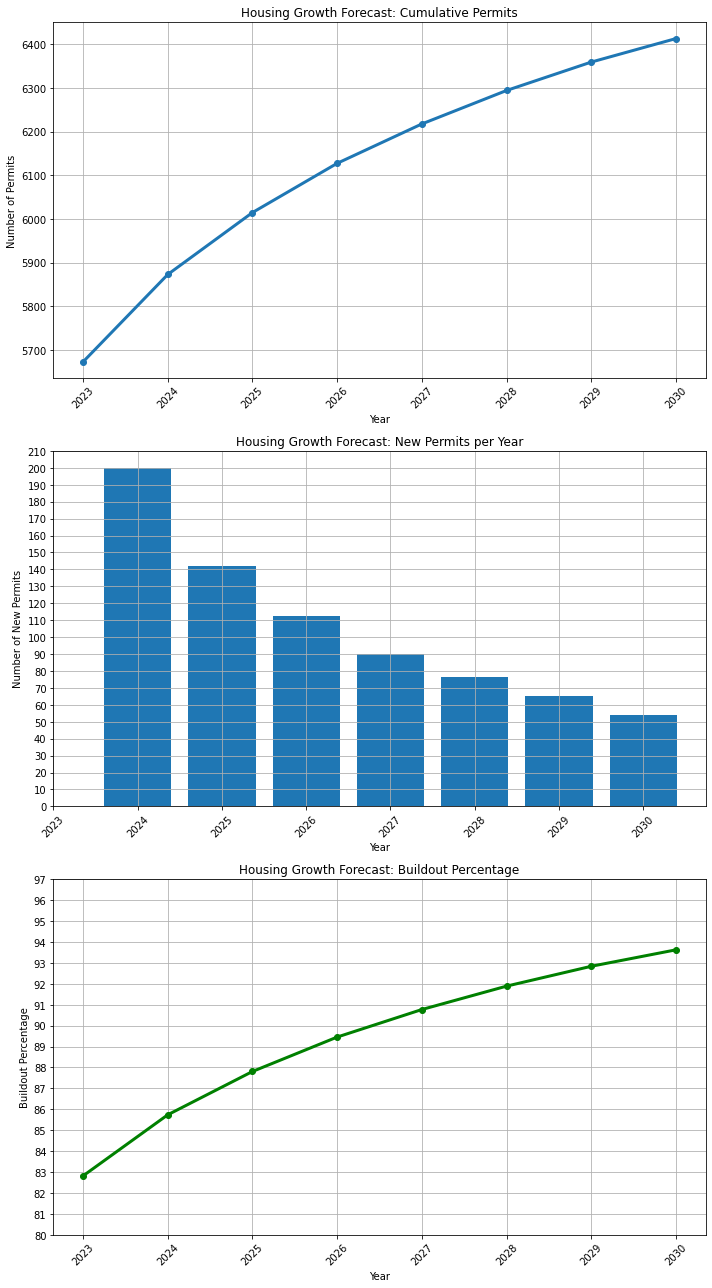

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Add this line for Jupyter Notebook compatibility
%matplotlib inline

# Read the transition probabilities from the XLSX file
def read_transition_probabilities(file_path):
    return pd.read_excel(file_path)

# Create the transition matrix for a given year
def create_transition_matrix(probs, year):
    return np.array([
        [probs[f'flippers-flippers'][year], probs[f'flippers-builders'][year], probs[f'flippers-prospects'][year], probs[f'flippers-adjacents'][year], 0],
        [probs[f'builders-flippers'][year], probs[f'builders-builders'][year], probs[f'builders-prospects'][year], probs[f'builders-adjacents'][year], probs[f'builders-permits'][year]],
        [probs[f'prospects-flippers'][year], probs[f'prospects-builders'][year], probs[f'prospects-prospects'][year], probs[f'prospects-adjacents'][year], probs[f'prospects-permits'][year]],
        [probs[f'adjacents-flippers'][year], probs[f'adjacents-builders'][year], probs[f'adjacents-prospects'][year], probs[f'adjacents-to-adjacents'][year], 0],
        [0, 0, 0, 0, 1]  # permits state is absorbing
    ])

# Perform the forecast
def forecast(initial_state, transition_probs, n_years):
    states = [initial_state]
    for year in range(n_years):
        transition_matrix = create_transition_matrix(transition_probs, year)
        next_state = np.dot(states[-1], transition_matrix)
        states.append(next_state)
    return np.array(states)

# Main function
def main():
    # Parameters for 2023 (refer to tail_oberved_data.xlsx) 
    start_year = 2023
    n_platted_lots = 6850
    # Estimates of unpermitted states as of the end of 2023
    n_flippers = 216
    n_builders = 283
    n_prospects = 483
    n_adjacents = 193
    n_permits = 5673  # Permitted lots by end of 2023
    n_years = 7  # Number of years in the forecast
    
    file_path = 'forecasted_transition_probabilities_0.15.xlsx'

    # Read transition probabilities
    transition_probs = read_transition_probabilities(file_path)

    # Initialize state
    initial_state = np.array([n_flippers, n_builders, n_prospects, n_adjacents, n_permits])

    # Perform forecast
    forecast_results = forecast(initial_state, transition_probs, n_years)

    # Print results
    state_names = ['Flippers', 'Builders', 'Prospects', 'Adjacents', 'Permits']
    
    for year, state in enumerate(forecast_results):
        print(f"Year {start_year + year}:")
        for name, value in zip(state_names, state):
            print(f"  {name}: {value:.2f}")
        print()

    # Calculate new permits for each year
    new_permits = np.diff(forecast_results[:, 4])
    
    # Calculate buildout percentage
    buildout_percentage = forecast_results[:, 4] / n_platted_lots * 100

    # Create year labels for x-axis
    years = range(start_year, start_year + n_years + 1)

    # Plot permits (forecast), new permits, and buildout percentage
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 18))

    # Plot cumulative permits
    ax1.plot(years, forecast_results[:, 4], marker='o', linewidth=3)
    ax1.set_title('Housing Growth Forecast: Cumulative Permits')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Permits')
    ax1.grid(True)
    ax1.yaxis.set_major_locator(MultipleLocator(100))  # Set major gridlines for the vertical axis to 100

    # Plot new permits
    ax2.bar(years[1:], new_permits)
    ax2.set_title('Housing Growth Forecast: New Permits per Year')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of New Permits')
    ax2.grid(True)
    ax2.yaxis.set_major_locator(MultipleLocator(10))  # Set major gridlines for the vertical axis to 10

    # Plot buildout percentage
    ax3.plot(years, buildout_percentage, marker='o', color='green', linewidth=3)
    ax3.set_title('Housing Growth Forecast: Buildout Percentage')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Buildout Percentage')
    ax3.yaxis.set_major_locator(MultipleLocator(1))  # Set major gridlines for the vertical axis to 1
    ax3.set_ylim(80, 97)
    ax3.grid(True)

    # Adjust x-axis ticks for better readability
    for ax in (ax1, ax2, ax3):
        ax.set_xticks(years[::1])  # Show every year
        ax.set_xticklabels(years[::1], rotation=45)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()